In [ ]:
!pip install tensorflow
!pip install matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Load IMDb dataset
vocab_size = 10000
max_len = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padding sequences to the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 210s 641ms/step - accuracy: 0.6541 - loss: 0.6170 - val_accuracy: 0.8148 - val_loss: 0.4084
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 254s 631ms/step - accuracy: 0.8486 - loss: 0.3705 - val_accuracy: 0.8368 - val_loss: 0.3751
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 628ms/step - accuracy: 0.8782 - loss: 0.3030 - val_accuracy: 0.8456 - val_loss: 0.3668
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.8407 - loss: 0.3728

✅ Test Accuracy: 0.8430


<ipython-input-4-d8eccab9db1b>:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-d8eccab9db1b>:22: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


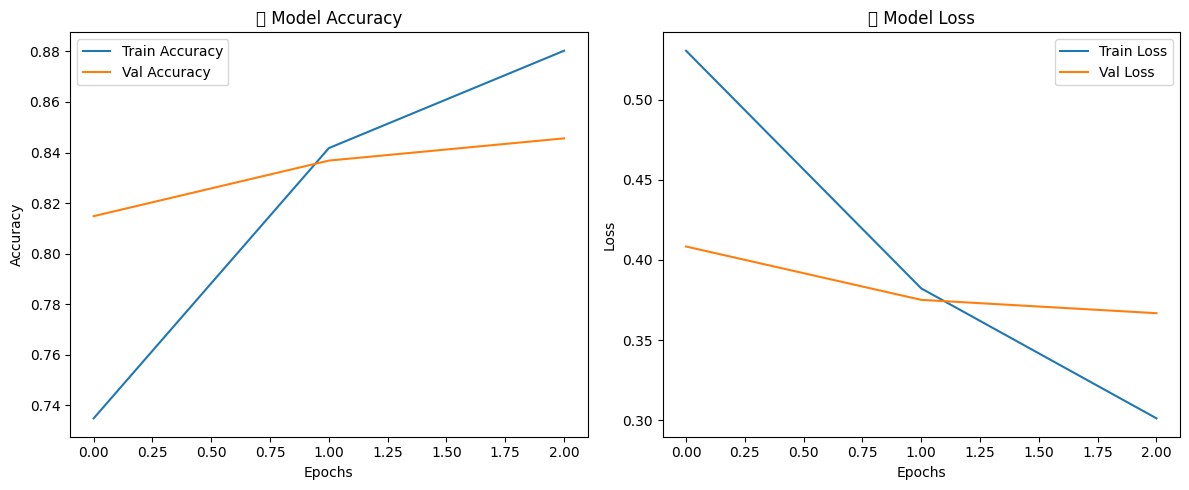

In [ ]:
# Visualize training vs validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("📈 Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("📉 Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
